In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
file = '../database/publication_database.csv'
images = '../publication_images'
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
file = '../database/publication_database.csv'

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('omphacite')
model_names

['zhang_19_omph', 'Liu_19_omph', 'Liu_21_omph']

# Exploring Pyrrhenious's Omphacite Models Database Correspondence

Here we look at Omphacite models parameterization correspondence of:

 
 * Zhang et al., 2019. Electrical Conductivity of Omphacite as a Function of Water Content and Implications for High Conductivity Anomalies in the Dabie-Sulu UHPM Belts and Tibet
  
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
  
 * Liu et al., 2021. Electrical conductivity of omphacite and garnet indicates limited deep water recycling by crust subduction.


## Zhang et al., 2019

['Electrical Conductivity of Omphacite as a Function of Water Content and Implications for High Conductivity Anomalies in the Dabie-Sulu UHPM Belts and Tibet']
omphacite
zhang_19_omph:{1483.0(2.60E+02) (X_fe+1e-05(0.03))^0.09(0.03) (Cw)^1.1(0.1) 
exp( -(1.05(0.03) +-0.71(0.05)(X_fe+1e-05(0.03))^1.0(nan)+-0.38(0.07) Cw^0.33333(nan)  )/kT)}


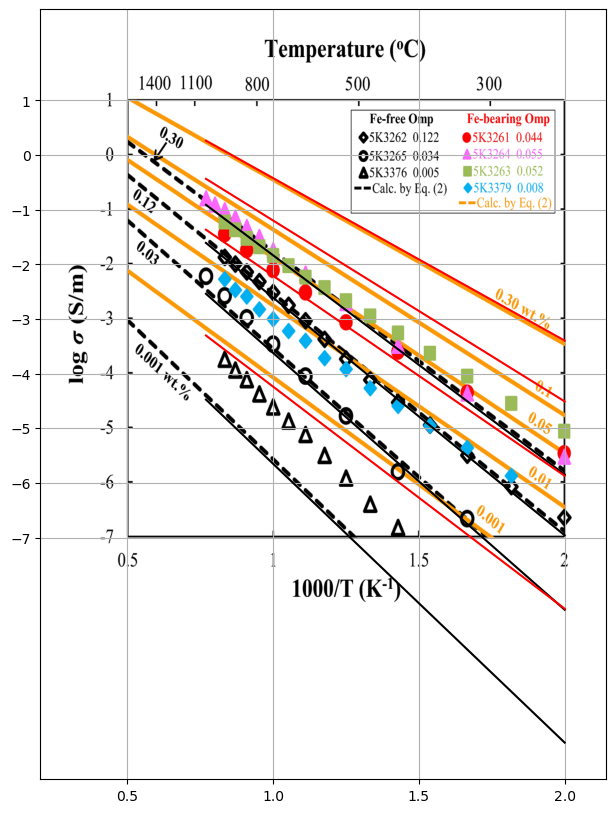

In [2]:
model = 'zhang_19_omph'
ec_model_row = ecdatabase.get_model_properties(model)
print(ec_model_row['title'].values)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, '../publication_images')
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    print(model)
    for w in [0.001,0.03,0.12,0.3]: 
        c1 = model.get_conductivity(X_fe=0.00001,Cw=w*1e4,T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(c1),color='black')
    for w in [0.001,0.03,0.12,0.3]: 
        c2 = model.get_conductivity(X_fe=0.29,Cw=w*1e4,T=temperature_range)
        ax.plot(1e3/temperature_range,np.log10(c2),color='red')
    


## Liu et al., 2019

['Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content']
omphacite


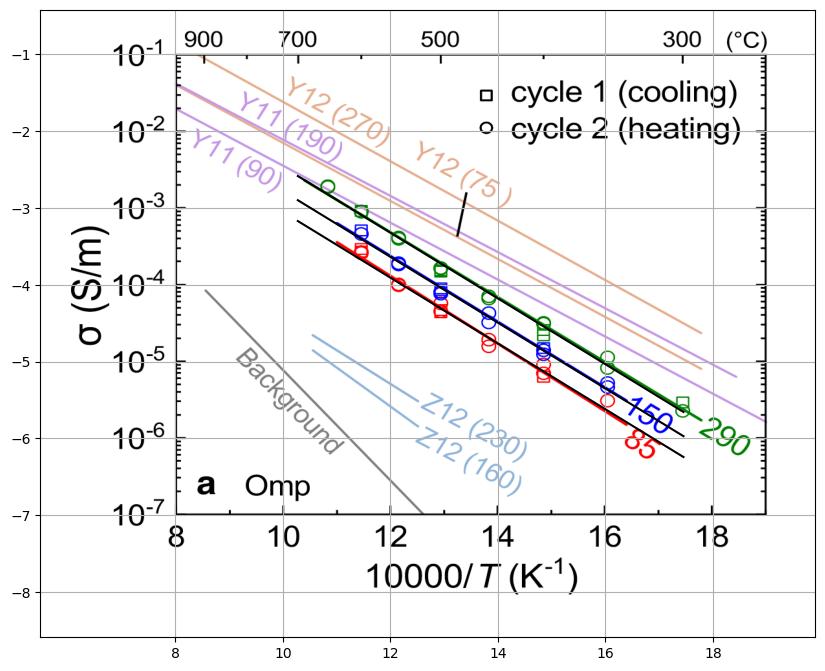

In [3]:
model = 'Liu_19_omph'
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties('Liu_19_omph')
print(ec_model_row['title'].values)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==0:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for w in [85,150,290]: 
        c1 = model.get_conductivity(X_fe=0,Cw=w,T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(c1),color='black')
   

['Electrical conductivity of omphacite and garnet indicates limited deep water recycling by crust subduction']
omphacite
Liu_21_omph:{289170.0(3.80E+04) (X_fe+1e-05(0.03))^-0.09(0.09) (Cw)^1.0(0.0) 
exp( -(1.29(0.062186) +-0.716378(0.062186)(X_fe+1e-05(0.03))^0.333333(nan)+0.26947(0.082914) Cw^0.333333(nan)  )/kT)}


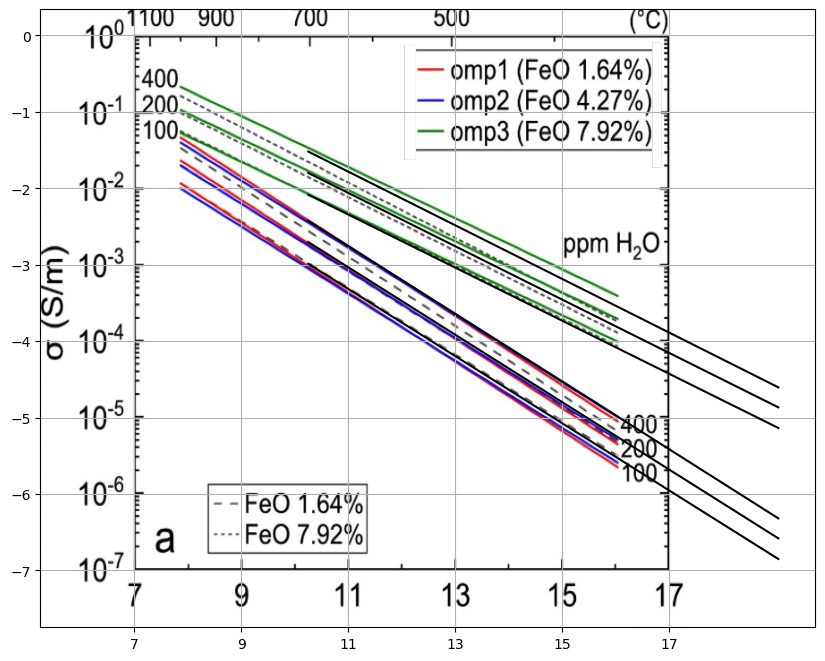

In [4]:
model = 'Liu_21_omph'
water =[0,135,890]
ec_model_row = ecdatabase.get_model_properties('Liu_21_omph')
print(ec_model_row['title'].values)
print(ec_model_row['phase_type'].values[0])
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
model = ecdatabase.get_model(model)
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    if i==1:
        continue
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    print(model)
    for w in [100,200,400]: 
        for iron,mg in [[1.64,10.57],[7.92,8.39]]:
            mol_iron = 55.8+16
            mol_mg = 24.3 + 16
            iron_frac = mol_iron*iron/(mol_iron*iron + mg*mol_mg)
            c1 = model.get_conductivity(X_fe=iron_frac,Cw=w,T=temperature_range)
            ax.plot(1e4/temperature_range,np.log10(c1),color='black')
        
   